In [2]:
!pip install tensorflow
!pip install matplotlib
!pip install Pillow
!pip install scipy


In [3]:
from PIL import Image


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt
import numpy as np
import os
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [5]:
# Paths to your training and validation data
train_dir = r'C:\Users\jayve\OneDrive\Desktop\pest_detection_app\data\train'
validation_dir = r'C:\Users\jayve\OneDrive\Desktop\pest_detection_app\data\validation'


In [6]:
# Prepare data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    rotation_range=20
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical'
)


Found 2700 images belonging to 9 classes.
Found 2700 images belonging to 9 classes.


In [7]:
# Build the model
from tensorflow.keras.layers import Input

model = Sequential([
    Input(shape=(150, 150, 3)),  # Use the Input layer instead of input_shape in Conv2D
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [8]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


C:\Users\jayve\anaconda3\envs\abd\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 42s 465ms/step - accuracy: 0.1906 - loss: 2.3165 - val_accuracy: 0.4092 - val_loss: 1.7369
Epoch 2/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - accuracy: 0.4062 - loss: 1.6225 - val_accuracy: 0.4167 - val_loss: 1.4863
Epoch 3/10


C:\Users\jayve\anaconda3\envs\abd\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 340ms/step - accuracy: 0.4142 - loss: 1.6171 - val_accuracy: 0.6060 - val_loss: 1.1480
Epoch 4/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 524us/step - accuracy: 0.6562 - loss: 1.1439 - val_accuracy: 0.7500 - val_loss: 1.3111
Epoch 5/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 29s 344ms/step - accuracy: 0.5903 - loss: 1.1940 - val_accuracy: 0.7511 - val_loss: 0.7440
Epoch 6/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.6875 - loss: 0.8802 - val_accuracy: 0.9167 - val_loss: 0.4383
Epoch 7/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 336ms/step - accuracy: 0.7643 - loss: 0.7381 - val_accuracy: 0.8787 - val_loss: 0.3885
Epoch 8/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.7812 - loss: 0.6933 - val_accuracy: 0.9167 - val_loss: 0.2510
Epoch 9/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 28s 336ms/step - accuracy: 0.8635 - loss: 0.4394 - val_accuracy: 0.8456 - val_loss: 0.6335
Epoch 10/10
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.9688 - loss: 0.4185 - val_accuracy: 0.9167 -

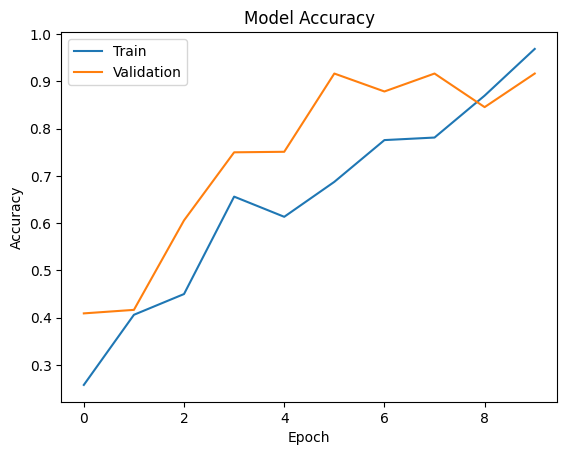

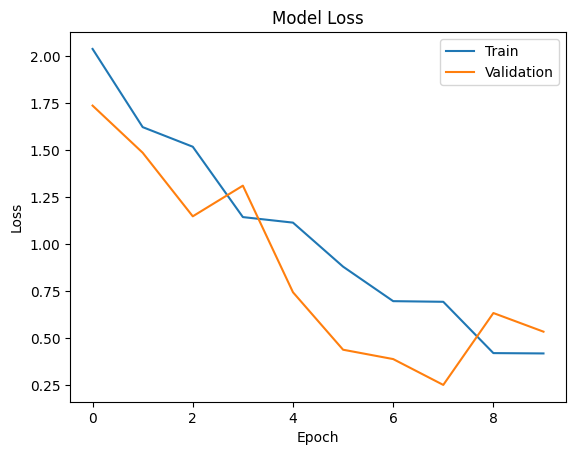

In [9]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [10]:
# Save the model
model.save('pest_model.keras')


In [16]:
# Evaluate the model using validation data
y_true = validation_generator.classes
y_pred = model.predict(validation_generator, steps=validation_generator.samples // validation_generator.batch_size, verbose=1)
y_pred_classes = np.argmax(y_pred, axis=1)



print(f"Total samples in y_true: {len(y_true)}")
print(f"Total samples in y_pred: {len(y_pred)}")

print(f"Shape of y_pred: {y_pred.shape}")


84/84 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step
Total samples in y_true: 2700
Total samples in y_pred: 2688
Shape of y_pred: (2688, 9)


In [18]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Assuming y_true and y_pred are available
# y_pred should be the output of your model with shape (2688, 9), which represents class probabilities

# If y_pred is (2688, 9), we need to use np.argmax to get the class predictions
y_pred_classes = np.argmax(y_pred, axis=1)

# Ensure both y_true and y_pred_classes have the same length
if len(y_true) > len(y_pred_classes):
    # Pad y_pred_classes with a default value (e.g., -1) to match the length of y_true
    padding_length = len(y_true) - len(y_pred_classes)
    y_pred_classes = np.pad(y_pred_classes, (0, padding_length), mode='constant', constant_values=-1)
elif len(y_true) < len(y_pred_classes):
    # Trim y_pred_classes if it's longer than y_true
    y_pred_classes = y_pred_classes[:len(y_true)]

# Now calculate precision, recall, F1 score, and accuracy
precision = precision_score(y_true, y_pred_classes, average='weighted', zero_division=0)
recall = recall_score(y_true, y_pred_classes, average='weighted', zero_division=0)
f1 = f1_score(y_true, y_pred_classes, average='weighted', zero_division=0)
accuracy = accuracy_score(y_true, y_pred_classes)

# Print metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")


Precision: 0.1153
Recall: 0.1130
F1 Score: 0.1116
Accuracy: 0.1130


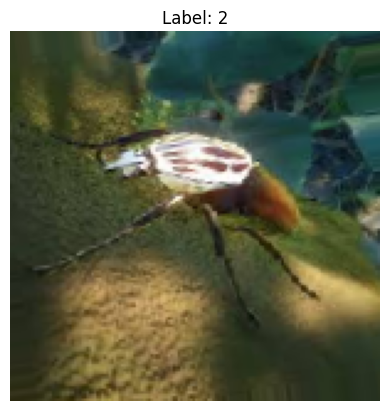

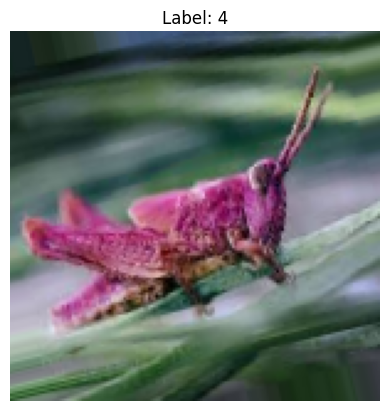

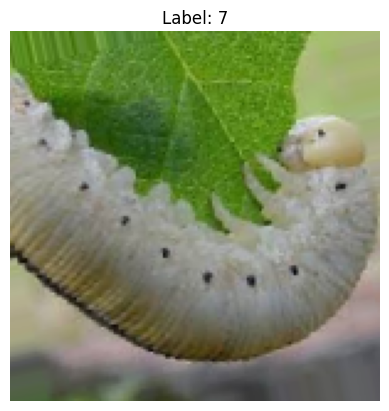

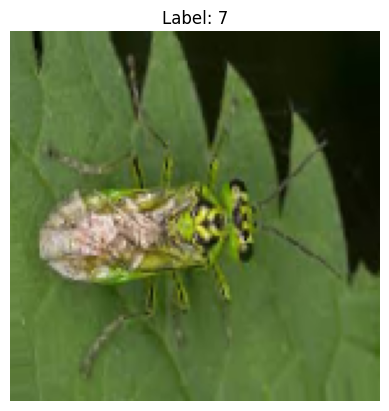

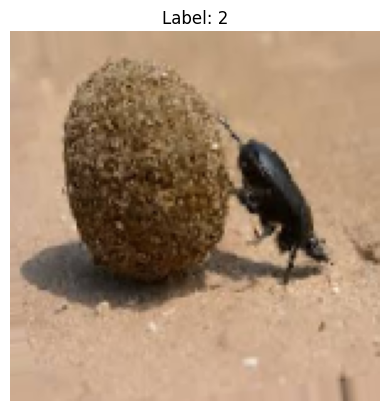

In [19]:
import matplotlib.pyplot as plt
import numpy as np

# Display sample images and labels from the training data
for i in range(5):  # Display 5 sample images
    img, label = next(train_generator)  # Get the next batch of images and labels
    plt.imshow(img[0])  # Display the first image from the batch
    plt.title(f'Label: {np.argmax(label[0])}')  # Display the label for the first image
    plt.axis('off')  # Hide axes
    plt.show()


In [20]:
from tensorflow.keras.preprocessing import image
import numpy as np
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from IPython.display import display, HTML


In [21]:
# Load the trained model
model = tf.keras.models.load_model('pest_model.keras')

# Pest classes (based on your dataset)
pest_classes = [
    'Aphid', 'Armyworm', 'Beetle', 'Bollworm', 'Grasshopper',
    'Mites', 'Mosquito', 'Sawfly', 'Stem Borer'
]

# Directory for image uploads (set this based on your local setup)
UPLOAD_FOLDER = 'upload'
if not os.path.exists(UPLOAD_FOLDER):
    os.makedirs(UPLOAD_FOLDER)


In [22]:
def identify_pest(image_path):
    img = image.load_img(image_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Rescale like during training

    predictions = model.predict(img_array)
    class_index = np.argmax(predictions)
    pest_type = pest_classes[class_index]
    return pest_type, predictions[0][class_index]

def get_control_measures(pest_type):
    measures = {
        'Aphid': {
            'damage': 'Weakens plants by sucking sap, causing leaves to curl and distort.',
            'control': 'Use insecticidal soap, neem oil, or introduce ladybugs to control them.'
        },
        'Armyworm': {
            'damage': 'Chews on plant leaves, creating irregular holes and defoliating crops.',
            'control': 'Apply Bacillus thuringiensis (Bt) or neem oil to manage armyworm infestations.'
        },
        'Beetle': {
            'damage': 'Feeds on plant foliage and roots, causing holes in leaves and stunted growth.',
            'control': 'Use insecticidal soap, neem oil, or hand-pick beetles off plants.'
        },
        'Bollworm': {
            'damage': 'Feeds on cotton bolls and other crops, leading to reduced yield and damaged fruit.',
            'control': 'Apply biological control methods such as Bt or use insecticides. Hand-picking larvae is also effective.'
        },
        'Grasshopper': {
            'damage': 'Consumes leaves, stems, and flowers, often causing significant crop loss.',
            'control': 'Use insecticides or introduce natural predators like birds or spiders.'
        },
        'Mites': {
            'damage': 'Sucks plant sap, causing leaves to yellow and dry out, often leading to leaf drop.',
            'control': 'Apply miticides or neem oil to control mite infestations.'
        },
        'Mosquito': {
            'damage': 'Lays eggs in standing water, potentially spreading diseases to plants and animals.',
            'control': 'Use larvicides to kill larvae or insect repellents to reduce mosquito presence.'
        },
        'Sawfly': {
            'damage': 'Feeds on leaves, skeletonizing them or creating notches along leaf edges.',
            'control': 'Apply insecticides or manually remove larvae. Remove affected plants to control spread.'
        },
        'Stem Borer': {
            'damage': 'Bores into stems and stalks, causing structural damage and reduced plant vigor.',
            'control': 'Use appropriate insecticides or biological controls such as parasitic wasps.'
        }
    }
    
    return measures.get(pest_type, {
        'damage': 'No damage information available.',
        'control': 'No control measures available.'
    })


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Pest Type: Mosquito
Confidence: 1.00
Damage: Lays eggs in standing water, potentially spreading diseases to plants and animals.
Control Measures: Use larvicides to kill larvae or insect repellents to reduce mosquito presence.


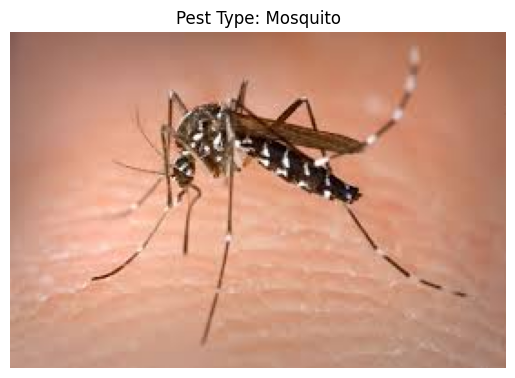

In [23]:
# Upload and predict on a test image
test_image_path = r"C:\Users\jayve\OneDrive\Desktop\pest_detection_app\data\validation\mosquito\jpg_0 - Copy (3).jpg"  # Corrected the file path

# Identify pest and get control measures
pest_type, confidence = identify_pest(test_image_path)
control_measures = get_control_measures(pest_type)

# Display the result
print(f"Pest Type: {pest_type}")
print(f"Confidence: {confidence:.2f}")
print(f"Damage: {control_measures['damage']}")
print(f"Control Measures: {control_measures['control']}")

# Display the test image
img = image.load_img(test_image_path)
plt.imshow(img)
plt.title(f'Pest Type: {pest_type}')
plt.axis('off')  # Hide the axes for a cleaner look
plt.show()


In [24]:
html_code = f"""
<h2>Pest Detection Results</h2>
<p><b>Pest Type:</b> {pest_type}</p>
<p><b>Confidence:</b> {confidence:.2f}</p>
<p><b>Damage:</b> {control_measures['damage']}</p>
<p><b>Control Measures:</b> {control_measures['control']}</p>
"""
display(HTML(html_code))


In [ ]:
from IPython.display import display, HTML  # Corrected import

# Function to identify pests and get control measures for multiple images
def process_images(image_paths):
    results = []  # Store results for each image
    for image_path in image_paths:
        try:
            pest_type, confidence = identify_pest(image_path)
            control_measures = get_control_measures(pest_type)

            # Store the results in a dictionary
            results.append({
                'image_path': image_path,
                'pest_type': pest_type,
                'confidence': confidence,
                'damage': control_measures['damage'],
                'control': control_measures['control'],
            })

            # Display the test image
            img = image.load_img(image_path)
            plt.imshow(img)
            plt.title(f'Pest Type: {pest_type}')
            plt.axis('off')  # Hide the axes for a cleaner look
            plt.show()

        except Exception as e:
            results.append({'image_path': image_path, 'error': str(e)})
    
    return results

# Main program
def main():
    image_paths = []
    print("Enter the full paths to the test images (one per line). Press Enter without typing anything to finish:")

    while True:
        path = input("Image path: ")
        if path.strip() == "":  # Exit on empty input
            break
        image_paths.append(path.strip('"'))  # Remove surrounding quotes if any

    # Process the images and get results
    results = process_images(image_paths)

    # Prepare HTML output
    html_output = "<h2>Pest Detection Results</h2>"
    
    for result in results:
        if 'error' in result:
            html_output += f"<p style='color: red;'>Error for <b>{result['image_path']}</b>: {result['error']}</p>"
        else:
            html_output += f"""
                <div style='border: 1px solid #ccc; margin: 10px; padding: 10px;'>
                    <p><b>Image Path:</b> {result['image_path']}</p>
                    <p><b>Pest Type:</b> {result['pest_type']}</p>
                    <p><b>Confidence:</b> {result['confidence']:.2f}</p>
                    <p><b>Damage:</b> {result['damage']}</p>
                    <p><b>Control Measures:</b> {result['control']}</p>
                </div>
                <hr>
            """  # Add a separator for clarity

    # Display the HTML results
    display(HTML(html_output))

# Run the main program
if __name__ == "__main__":
    main()


Enter the full paths to the test images (one per line). Press Enter without typing anything to finish:
